# Кластеризация


## 1. Информация о данных

Этот набор данных содержит положения и скорости звезд (частиц) в прямом моделировании N тел звездного скопления. В скоплении изначально 64000 звезд, распределенных в пространственно-позиционном пространстве согласно модели Кинга.

- х, у, z
  
  Столбцы 1, 2 и 3 каждого файла - это положения звезд по x, y, z. Они также выражаются в стандартных единицах N-тела.

- vx, vy, vz
  
  Столбцы 4, 5 и 6 содержат значения скорости по осям x, y и z, также в единицах N тел.

- m 
  
  В столбце 7 указана масса каждой звезды. Для этой симуляции это идентично 1.5625e-05, то есть 1/64000.

## 2. Предварительный анализ данных

### 2.1. Импорт необходимых библиотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### 2.2. Чтение датасета

In [ ]:
# Чтение датасета
df = pd.read_csv('c_0000.csv')

# Посмотрим на зависимость скорости координаты от её положения для x, y, z
X = df.iloc[:, [0, 3]]
Y = df.iloc[:, [1, 4]]
Z = df.iloc[:, [2, 5]]

In [ ]:
# Построим графики зависимости
plt.subplot(131)
plt.xlabel('X position of stars')
plt.ylabel('Velocity in X axis of stars')
plt.scatter(X.x, X.vx, color="#2e4600", s=4)

plt.subplot(132)
plt.xlabel('Y position of stars')
plt.ylabel('Velocity in Y axis of stars')
plt.scatter(Y.y, Y.vy, color="#7d4427", s=4)

plt.subplot(133)
plt.xlabel('Z position of stars')
plt.ylabel('Velocity in Z axis of stars')
plt.scatter(Z.z, Z.vz, color="#a2c523", s=4)

plt.show()

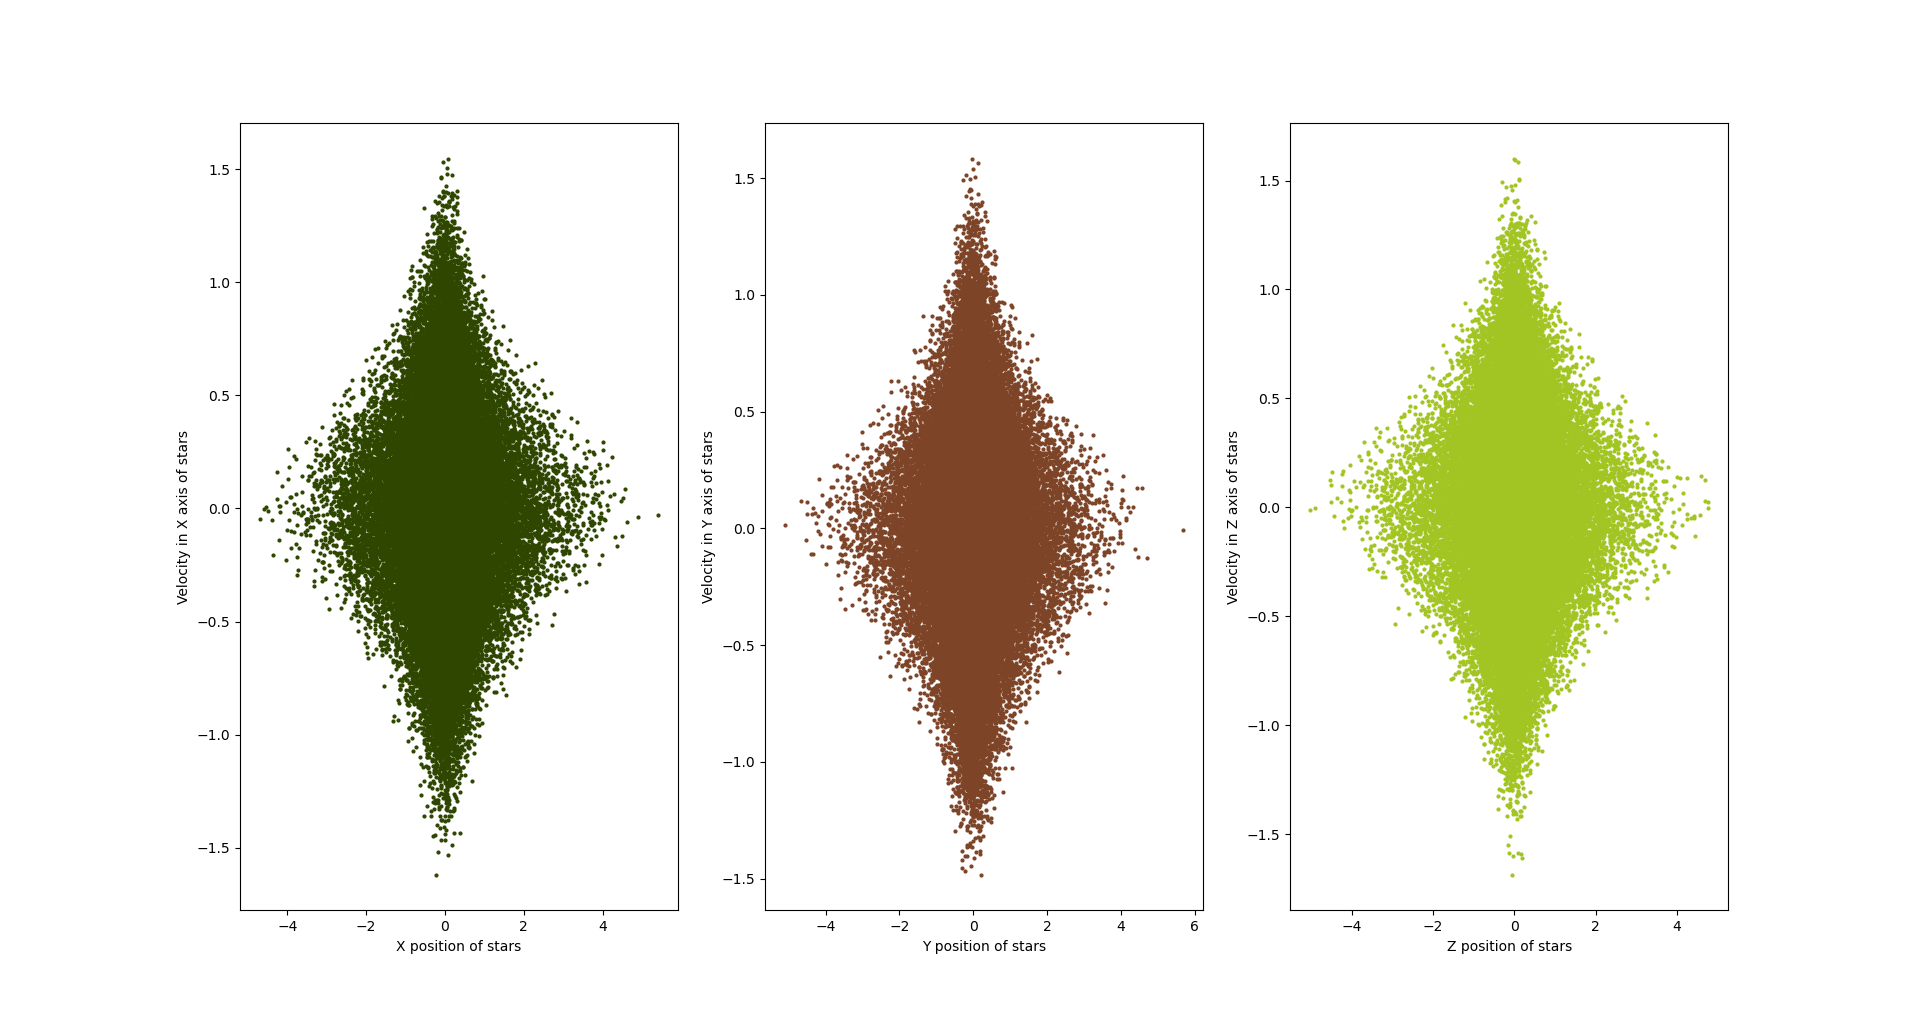

Поскольку зависимость скорости координаты от её положения для x, y, z одинакова, имеет смысл класстеризовать данные по 2 двум признакам:
- Положение координаты
- Её скорость по какой-нибуль из координат

Для определённости будем рассматривать координату x

### 2.3. Выбор количества кластеров


Для того, чтобы выделить оптимальное количество кластеров, посмотрим на зависимость инерции от количества кластеров. Для этого в цикле находим значение инерции для каждого k (k - количество кластеров). После этого строим график зависимости

In [ ]:
inertia = []
for k in range(1, 15):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    inertia.append(k_means.inertia_)

plt.plot(range(1, 15), inertia)
plt.show()

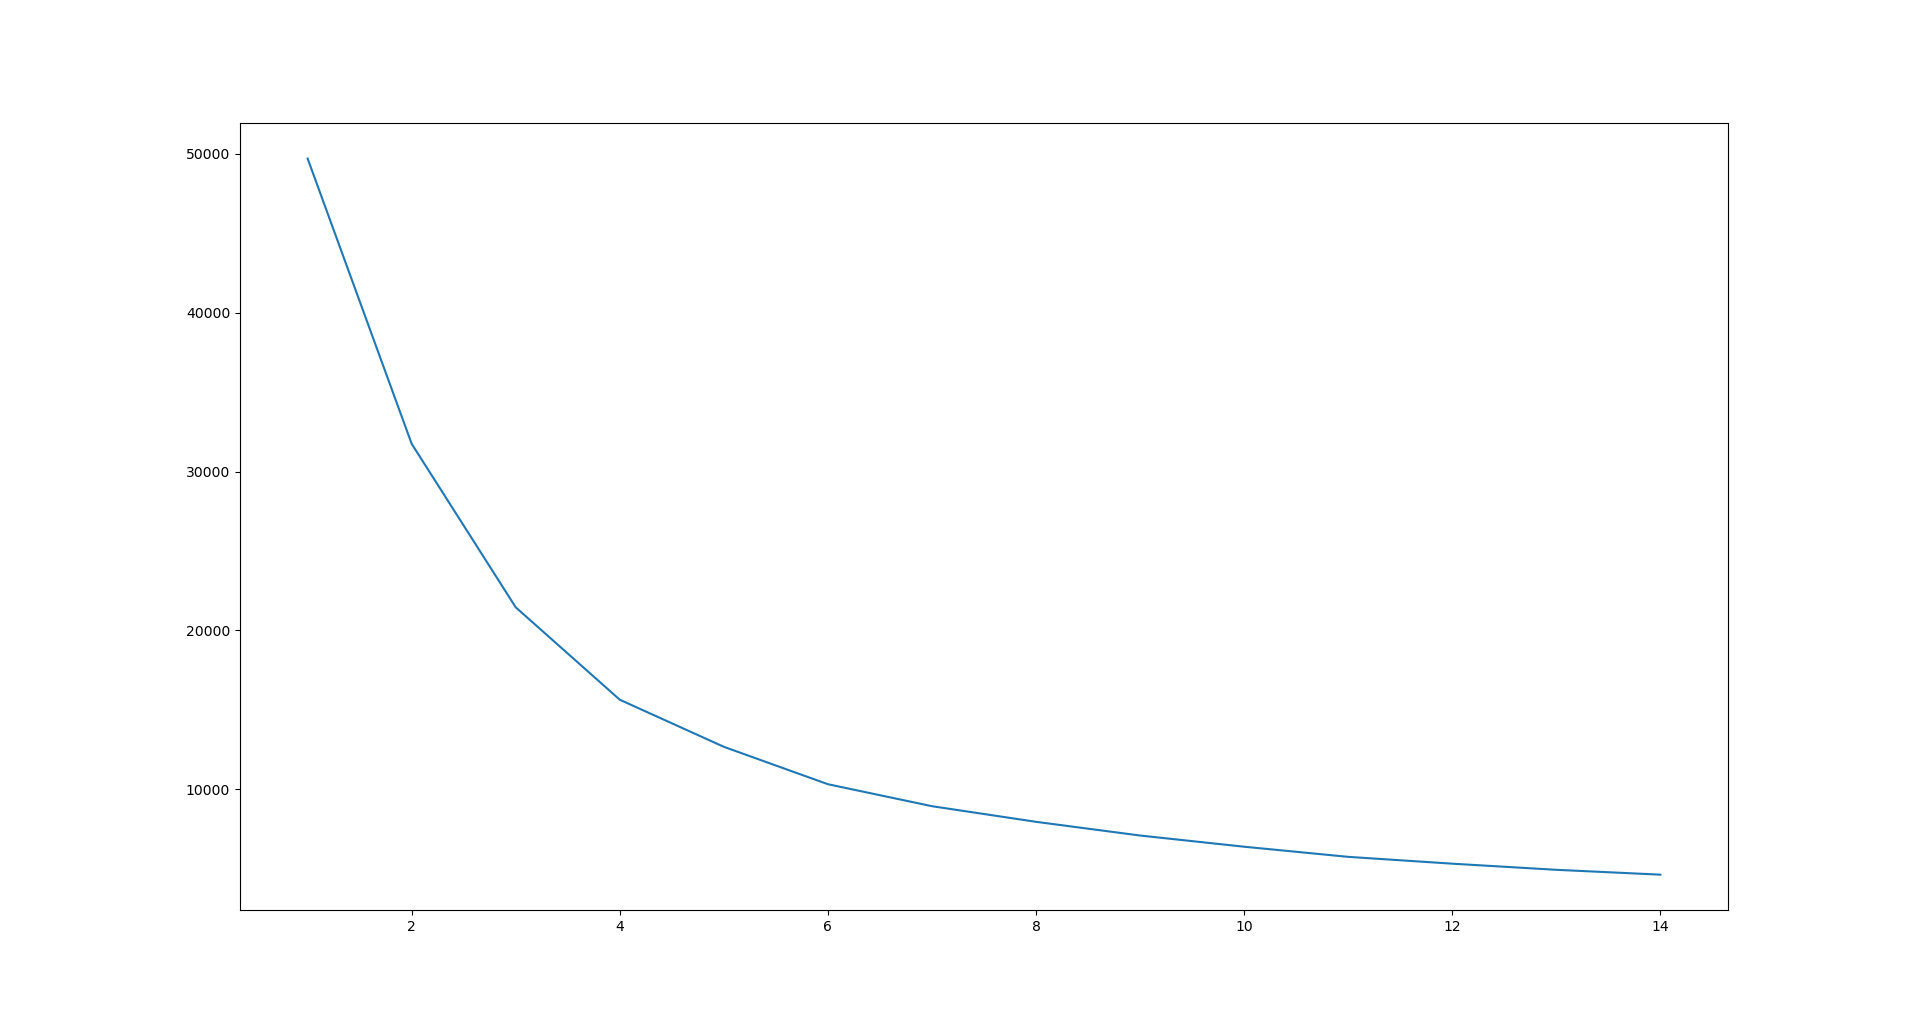

По графику видно, что после k = 4 скорость уменьшения инерции изменяется незначительно. Получаем, что оптимальным вариантом будет k = 4

## 3. Применение алгорима K-Means

Для кластеризации применяем алгоритм K-Means, количество кластеров в данном случае будет равным 4. После кластеризации визуализируем полученное разделение на кластеры

In [ ]:
# Применение алгоритма
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X)

# Добавление колонки label к таблице X
X.insert(1, "label", clusters)

# Визуализация данных
plt.scatter(X.x[X.label == 0], X.vx[X.label == 0], color="#2e4600", s=4)
plt.scatter(X.x[X.label == 1], X.vx[X.label == 1], color="#7d4427", s=4)
plt.scatter(X.x[X.label == 2], X.vx[X.label == 2], color="#a2c523", s=4)
plt.scatter(X.x[X.label == 3], X.vx[X.label == 3], color="#486b00", s=4)

# Добавление центроидов кластеров
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color="orange", s=200) # scentroidler

plt.show()

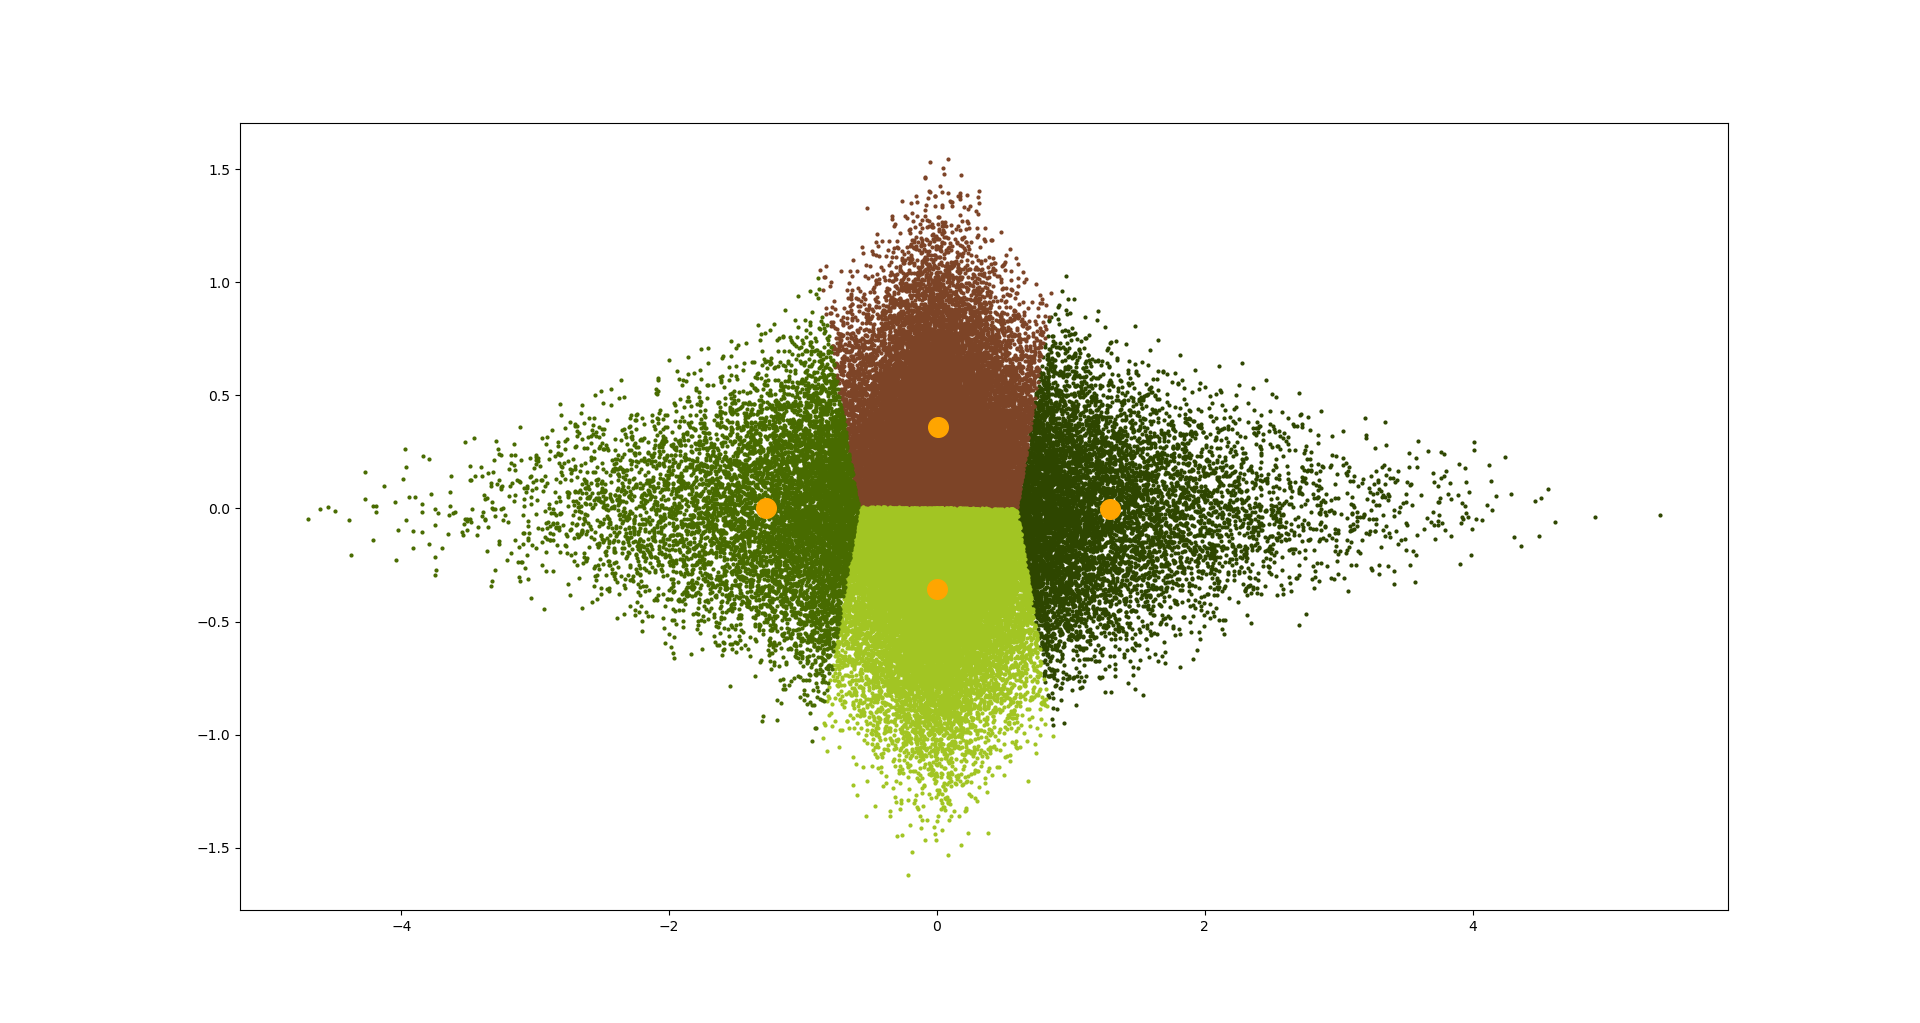

## 4. Выводы

Алгорим K-Means разделил звёзды (частицы) на 4 кластера
- Частицы с положительными координатами
- Частицы с отрицательными координатами
- Частицы к координатами, значение которых близко к нулю, а скорость либо положительна, либо близка к нулю
- Частицы к координатами, значение которых близко к нулю, а скорость либо отрицательна, либо близка к нулю